<center><span style="font-size: 30px;"><b>
File ipynb dùng để thể hiện chi tiết quá trình xử lí dữ liệu.
</b></span></center>




# main.py

### Import thư viện pandas, matplotlib


In [428]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt


### Nhập dữ liệu (dataset bị cắt xuống còn 200,000 sample)

In [429]:
df = pd.read_csv("./data/sampled.csv", parse_dates=['date'])
df.sample(5)

,commit,author,date,message,repo
104730,3f62028f2f3a904e608945147ebddc7051c0d6f9,Craig Topper <craig.topper@gmail.com>,Thu Feb 6 19:29:03 2020 -0800,[X86] Use SelectionDAG::getAllOnesConstant to ...,llvm/llvm-project
67928,fb04e59a379471c29bf11cd0a1645ce90e80fe31,jasper <jasper@openbsd.org>,Mon Jan 11 07:54:07 2016 +0000,add rcs ids,openbsd/src
167112,3c44fcaddcc294f908a3d8cab7dc7636654e1968,david <david@openbsd.org>,Tue Mar 18 13:14:02 2003 +0000,spelling typos/errors\n ok miod@ jmc@,openbsd/src
93633,ee2a0694b649941fc0c3be606746db041b75b91d,k8s-merge-robot <k8s.production.user@gmail.com>,Fri Apr 29 18:50:37 2016 -0700,Merge pull request #24872 from smarterclayton/...,kubernetes/kubernetes
89651,d61980af400e684daa824166c38672579501ceae,michaeln@chromium.org <michaeln@chromium.org@0...,Mon Sep 30 22:14:25 2013 +0000,Promote methods to register and revoke blob ur...,chromium/chromium


# preprocess.py

### Xử lí dữ liệu thiếu, trùng lặp (nếu có)

In [430]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [431]:
# df.tail()

### Preprocess (Tiền xử lý)

Dữ liệu ngày tháng trong file CSV thường được lưu dưới dạng chuỗi (string). Để có thể phân tích và thao tác với dữ liệu thời gian, ta cần chuyển đổi sang định dạng datetime.

```python
Mã              Ý nghĩa             Ví dụ
%a	    Tên thứ viết tắt	Mon, Tue, Wed
%b	    Tên tháng viết tắt	Jan, Feb, Mar
%d	    Ngày trong tháng	01-31
%H:%M:%S    Giờ:Phút:Giây       14:30:00
%Y	    Năm (4 chữ số)	2024
%z	    Múi giờ (timezone)	+0700 -> Chuyển hết về UTC+0
```

In [432]:
df['date'] = pd.to_datetime(df['date'].apply(lambda x: dt.strptime(x, "%a %b %d %H:%M:%S %Y %z")), utc=True)
df.dropna(subset=['date'], inplace=True)


In [433]:
df.sample(5)

,commit,author,date,message,repo
150540,f96ffb5acb872d29bc65d3fbcfd199f6aee5b67c,Poul-Henning Kamp <phk@FreeBSD.org>,1995-10-10 10:03:48+00:00,Another program depending on zero'ed malloc.\n...,freebsd/freebsd-src
75636,f1bccd320a742c67245ded0cbe5eba971294d769,Eugene Brevdo <ebrevdo@gmail.com>,2016-03-16 20:19:23+00:00,Another bugfix in run_and_gather_logs.\n Ch...,tensorflow/tensorflow
146026,78037ef122afa7468c5addbb10885b984b3eef05,Tobin C. Harding <me@tobin.cc>,2017-04-10 03:15:56+00:00,staging: ks7010: rename identifier packet to s...,torvalds/linux
81873,dfa78fd310aa3fb72ededd8fe203ef6be21c9d1e,Sophie Chang <sophiechang@chromium.org>,2020-02-04 01:49:34+00:00,Deprecate hints proto fields that are not call...,chromium/chromium
28826,0b874fd50a049a15c2402f64ef640b7b38d03f84,espie <espie@openbsd.org>,2012-07-09 13:38:37+00:00,create mode objects thru factory always: unifo...,openbsd/src


### Chuẩn hóa dữ liệu

##### Tách date thành các cột dday (yy/mm/dd), wday (tuần trong năm), month, year, time

In [434]:
df['dday'] = df['date'].dt.date
df['wday'] = df['date'].dt.weekday
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['time'] = df['date'].dt.strftime('%H:%M:%S')

##### Tách thông tin author thành 2 cột user và mail

In [435]:
df = df.join(df['author'].str.split('(<)', expand=True, n=2))

In [436]:
df.sample(5)

,commit,author,date,message,repo,dday,wday,day,month,year,time,0,1,2
1367,d7e41d4bfad1c9afc9972ae8cd773d63119366fc,fkr <fkr@openbsd.org>,2006-12-07 21:25:37+00:00,attach Novatel Merlin U740 to ubsa\n ok dlg@,openbsd/src,2006-12-07,3,7,12,2006,21:25:37,fkr,<,fkr@openbsd.org>
158995,6fe83bbf798cc7575935bb0830a1f5dc865bd0b2,jbrockmendel <jbrockmendel@gmail.com>,2018-11-03 13:24:18+00:00,"REF: cython cleanup, typing, optimizations (#2...",pandas-dev/pandas,2018-11-03,5,3,11,2018,13:24:18,jbrockmendel,<,jbrockmendel@gmail.com>
30970,da5e0494c542dddc56a1f1edfd30310ea30f41ff,Thomas Graf <tgraf@suug.ch>,2006-08-11 04:17:37+00:00,[NET]: Convert link modification to new netlin...,torvalds/linux,2006-08-11,4,11,8,2006,04:17:37,Thomas Graf,<,tgraf@suug.ch>
12536,8ec4e1f0555737594fa8abc832dcb32b0d8561c0,deraadt <deraadt@openbsd.org>,1996-01-02 11:20:26+00:00,supporte extended regular expressions; from jb...,openbsd/src,1996-01-02,1,2,1,1996,11:20:26,deraadt,<,deraadt@openbsd.org>
50767,c4c6e2364581b605c122f7b39948aabe296295b3,zecke@webkit.org <zecke@webkit.org@bbb929c8-8f...,2008-12-07 19:16:17+00:00,[Gtk+] Use glib's unit test facilities to test...,chromium/chromium,2008-12-07,6,7,12,2008,19:16:17,zecke@webkit.org,<,zecke@webkit.org@bbb929c8-8fbe-4397-9dbb-9b2b2...


In [437]:
df = df.drop('author', axis=1)
df = df.drop(1, axis=1)
df = df.rename({0:'author', 2:'mail'}, axis=1)
df['mail'] = df['mail'].str.strip('>')

In [438]:
df.sample(5)

,commit,date,message,repo,dday,wday,day,month,year,time,author,mail
69033,dfebaf8820e4c02db6481df09da89aca5dc78ba8,2020-04-28 21:41:57+00:00,Roll src/third_party/angle 1f9e2a8feb5a..13980...,chromium/chromium,2020-04-28,1,28,4,2020,21:41:57,chromium-autoroll,chromium-autoroll@skia-public.iam.gserviceacco...
76129,63a50be13d32b9e5f3aad8d1a6ba5362f17a252f,2015-05-31 07:48:49+00:00,[SPARK-3850] Trim trailing spaces for SQL.\n ...,apache/spark,2015-05-31,6,31,5,2015,07:48:49,Reynold Xin,rxin@databricks.com
123506,2ec360bbc319903f878135adeed85bb648ef95cf,2018-03-09 00:22:30+00:00,Merge branch 'drm/next/du' of git://linuxtv.or...,torvalds/linux,2018-03-09,4,9,3,2018,00:22:30,Dave Airlie,airlied@redhat.com
96650,ac09d109ca0dfe78b2caefc980a1007c8d33c2c2,2014-03-14 13:55:48+00:00,Rename cnt to maxcookies and change its use as...,freebsd/freebsd-src,2014-03-14,4,14,3,2014,13:55:48,Bryan Drewery,bdrewery@FreeBSD.org
158140,b917bb387812f9abb81fc842e4c3b3ec727e10cf,2016-11-08 16:18:35+00:00,"btrfs: reada, remove pointless BUG_ON check fo...",torvalds/linux,2016-11-08,1,8,11,2016,16:18:35,David Sterba,dsterba@suse.com


##### Xắp sếp theo thời gian

In [439]:
# df.sort_values(by='date', inplace=True, ascending=False)
# df.head()

In [440]:
# df.tail()

# analysis.py

### Các dữ liệu cơ bản:

In [441]:
print('Tổng số năm:', len(df['date'].dt.year.unique()))
print('Các năm trong dataset:\n',df['date'].dt.year.sort_values(ascending = False).unique())

Tổng số năm: 32
Các năm trong dataset:
 [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994
 1993 1992 1991 1990]


In [442]:
print('Tổng số repo:', len(df['repo'].unique()))
print('Các repo:\n', df['repo'].unique())

Tổng số repo: 34
Các repo:
 ['angular/angular' 'rust-lang/rust' 'llvm/llvm-project'
 'chromium/chromium' 'apple/swift' 'torvalds/linux' 'pytorch/pytorch'
 'openbsd/src' 'gcc-mirror/gcc' 'v8/v8' 'tensorflow/tensorflow'
 'apache/spark' 'postgres/postgres' 'freebsd/freebsd-src' 'nodejs/node'
 'matplotlib/matplotlib' 'numpy/numpy' 'jupyterlab/jupyterlab'
 'kubernetes/kubernetes' 'apache/httpd' 'ipython/ipython'
 'microsoft/vscode' 'microsoft/TypeScript' 'facebook/react'
 'python/cpython' 'opencv/opencv' 'scikit-learn/scikit-learn'
 'scipy/scipy' 'rstudio/rstudio' 'pandas-dev/pandas' 'denoland/deno'
 'golang/go' 'nginx/nginx' 'tidyverse/ggplot2']


### Thống kê số commit mỗi tháng

In [443]:
df_commits_per_month = df.groupby(['year', 'month']).size()

### Thống kê top authors

In [444]:
top_n = 10
df_top_authors = df['author'].value_counts().head(top_n)

### Thống kê tỷ lệ đóng góp: số commit của một author / tổng số commit theo repo (%)


In [445]:
def contribution_rate_author(df):
    contribution_stats = df.groupby(['repo', 'author']).size().reset_index(name='author_commits')
    contribution_stats['total_repo_commits'] = contribution_stats.groupby('repo')['author_commits'].transform('sum')
    contribution_stats['contribution_percentage'] = ((contribution_stats['author_commits'] / contribution_stats['total_repo_commits']) * 100).round(2)
    result = contribution_stats.groupby('repo').apply(
        lambda x: x.sort_values(by='contribution_percentage', ascending=False).head(1),
        include_groups=False
    ).reset_index(level=1, drop=True)  
    return result

contribution_rate_author(df)

,author,author_commits,total_repo_commits,contribution_percentage
repo,,,,
angular/angular,Igor Minar,55,903,6.09
apache/httpd,William A. Rowe Jr,105,1497,7.01
apache/spark,Matei Zaharia,66,1365,4.84
apple/swift,swift-ci,818,5487,14.91
chromium/chromium,chromium-autoroll,1695,46025,3.68
denoland/deno,Ryan Dahl,60,256,23.44
facebook/react,Paul O’Shannessy,78,637,12.24
freebsd/freebsd-src,Warner Losh,409,11811,3.46
gcc-mirror/gcc,GCC Administrator,363,8540,4.25


### Phân loại mục đích commit

In [446]:
def classify_commit(message):
    message = message.lower()
    if any(k in message for k in ['fix', 'bug', 'error', 'issue']):
        return 'Bugfix'
    elif any(k in message for k in ['feat', 'feature', 'add']):
        return 'Feature'
    elif any(k in message for k in ['refactor', 'clean']):
        return 'Refactor'
    elif any(k in message for k in ['doc', 'readme']):
        return 'Documentation'
    elif any(k in message for k in ['test', 'testing']):
        return 'Test'
    else:
        return 'Other'

def commit_type_ratio(df):
    df['commit_type'] = df['message'].apply(classify_commit)
    return df['commit_type'].value_counts()

### Phân loại độ dài của các commit message

In [447]:
def message_length_stats(df):
    df['message_length'] = df['message'].str.len()
    
    stats = {
        'mean': df['message_length'].mean(),
        'median': df['message_length'].median(),
        'min': df['message_length'].min(),
        'max': df['message_length'].max(),
        'std': df['message_length'].std()
    }
    
    bins = [0, 50, 100, 200, 500, float('inf')]
    labels = ['Rất ngắn (0-50)', 'Ngắn (51-100)', 'Trung bình (101-200)', 'Dài (201-500)', 'Rất dài (>500)']
    df['length_category'] = pd.cut(df['message_length'], bins=bins, labels=labels)
    
    return stats, df['length_category'].value_counts()

message_length_stats(df)

({'mean': np.float64(438.10842042102104),
  'median': np.float64(287.0),
  'min': np.int64(2),
  'max': np.int64(169539),
  'std': np.float64(1032.5239467315669)},
 length_category
 Dài (201-500)           66823
 Rất dài (>500)          55459
 Trung bình (101-200)    27675
 Ngắn (51-100)           25659
 Rất ngắn (0-50)         24374
 Name: count, dtype: int64)

### Phân loại commit theo khung giờ

In [448]:
def commits_by_time_frame(df):
    # Tách giờ từ cột time (HH:MM:SS)
    df['hour'] = df['time'].str.split(':').str[0].astype(int)
    
    # Phân loại theo khung giờ
    def get_time_frame(hour):
        if 6 <= hour < 12:
            return 'Sáng (6h-12h)'
        elif 12 <= hour < 18:
            return 'Chiều (12h-18h)'
        elif 18 <= hour < 22:
            return 'Tối (18h-22h)'
        else:
            return 'Đêm (22h-6h)'
    
    df['time_frame'] = df['hour'].apply(get_time_frame)
    
    return df['hour'].value_counts().sort_index(), df['time_frame'].value_counts()

commits_by_time_frame(df)


(hour
 0      9299
 1      7495
 2      6295
 3      5669
 4      5265
 5      5156
 6      5485
 7      5927
 8      6562
 9      7058
 10     6582
 11     6419
 12     6721
 13     7600
 14     8726
 15     9422
 16    10187
 17    11131
 18    11753
 19    11280
 20    11731
 21    11921
 22    11589
 23    10717
 Name: count, dtype: int64,
 time_frame
 Đêm (22h-6h)       61485
 Chiều (12h-18h)    53787
 Tối (18h-22h)      46685
 Sáng (6h-12h)      38033
 Name: count, dtype: int64)

# visualization.py

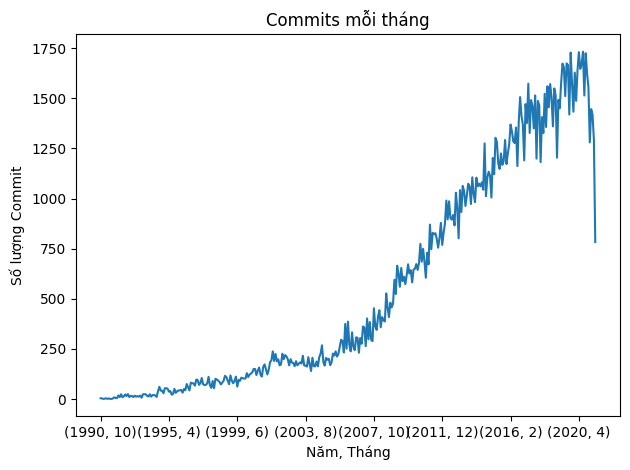

In [449]:
def plot_commits_per_month(series):
    series.sort_index().plot(kind='line')
    plt.title('Commits mỗi tháng')
    plt.xlabel('Năm, Tháng')
    plt.ylabel('Số lượng Commit')
    plt.tight_layout()
    # plt.savefig("plot_commits_per_month.png")
    plt.show()

plot_commits_per_month(df_commits_per_month)

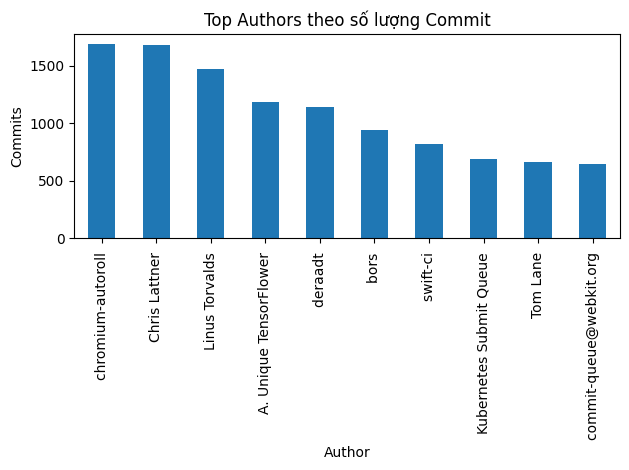

In [455]:
def plot_top_authors(series):
    series.plot(kind='bar')
    plt.title('Top Authors theo số lượng Commit')
    plt.xlabel('Author')
    plt.ylabel('Commits')
    plt.tight_layout()
    # plt.savefig("plot_top_authors.png")
    plt.show()

plot_top_authors(df_top_authors)

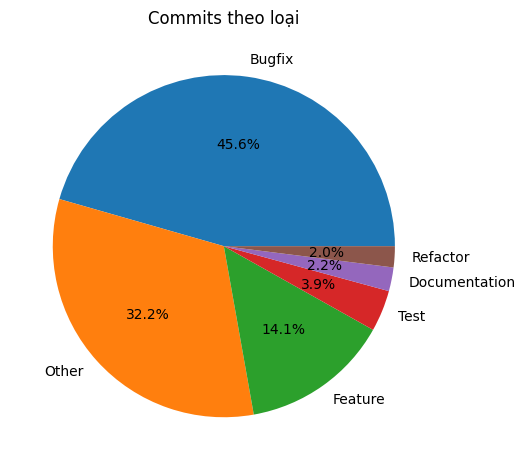

In [456]:
commit_types = commit_type_ratio(df)
def plot_commit_type_ratio(commit_types):
    commit_types.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Commits theo loại')
    plt.ylabel('')
    plt.tight_layout()
    # plt.savefig("plot_commit_type_ratio.png")
    plt.show()

plot_commit_type_ratio(commit_types)


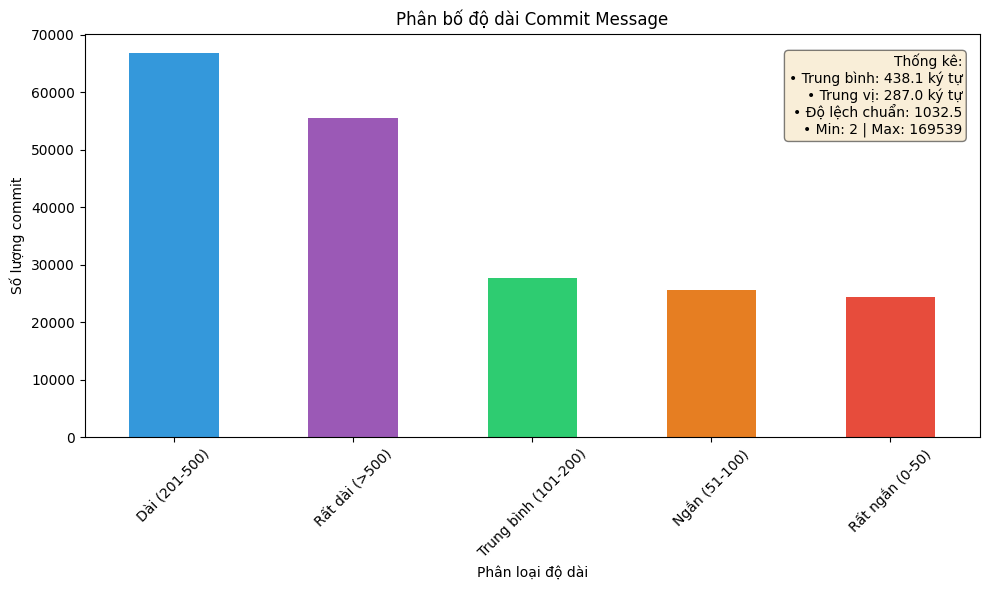

In [ ]:
def plot_message_length(stats, length_category):

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    colors = ['#3498db', '#9b59b6', '#2ecc71', '#e67e22', '#e74c3c']
    length_category.plot(kind='bar', ax=ax, color=colors)
    ax.set_title('Phân bố độ dài Commit Message')
    ax.set_xlabel('Phân loại độ dài')
    ax.set_ylabel('Số lượng commit')
    ax.tick_params(axis='x', rotation=45)
    
    stats_text = f"Thống kê:\n" \
                 f"• Trung bình: {stats['mean']:.1f} ký tự\n" \
                 f"• Trung vị: {stats['median']:.1f} ký tự\n" \
                 f"• Độ lệch chuẩn: {stats['std']:.1f}\n" \
                 f"• Min: {stats['min']} | Max: {stats['max']}"
    
    ax.text(0.98, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
#     plt.savefig("plot_message_length.png")
    plt.show()
# message_stats, length_category = message_length_stats(df)
plot_message_length(message_length_stats(df)[0], message_length_stats(df)[1])

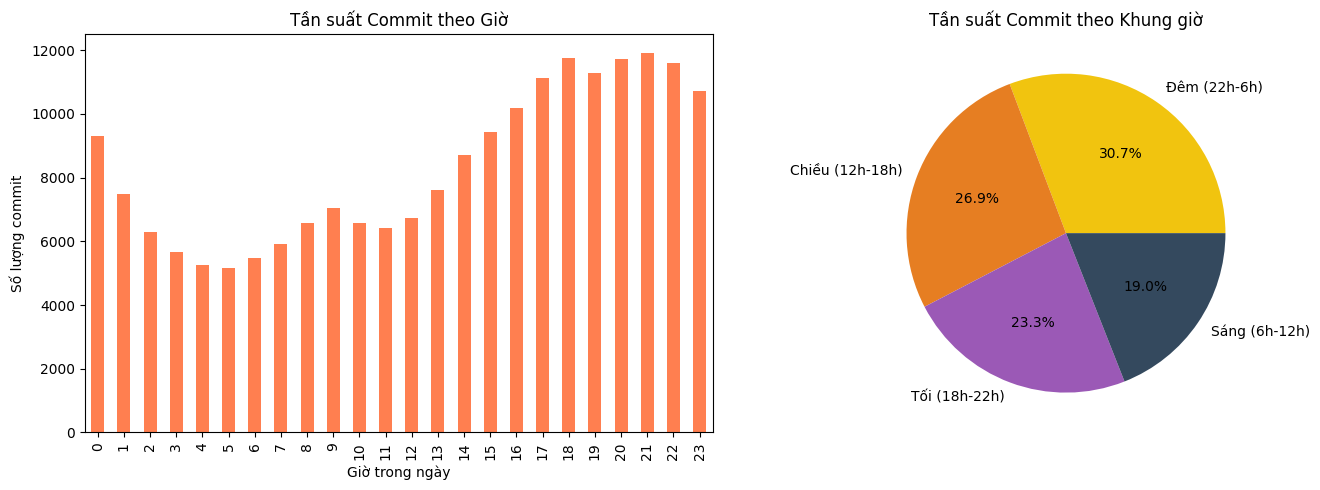

In [458]:
def plot_commits_by_time(hourly_commits, time_frame_commits):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    hourly_commits.plot(kind='bar', ax=axes[0], color='coral')
    axes[0].set_title('Tần suất Commit theo Giờ')
    axes[0].set_xlabel('Giờ trong ngày')
    axes[0].set_ylabel('Số lượng commit')
    
    colors = ['#f1c40f', '#e67e22', '#9b59b6', '#34495e']
    time_frame_commits.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors)
    axes[1].set_title('Tần suất Commit theo Khung giờ')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    # plt.savefig("plot_commits_by_time.png")
    plt.show()

hourly_commits, time_frame_commits = commits_by_time_frame(df)
plot_commits_by_time(hourly_commits, time_frame_commits)